In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('pizza_customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# Making constants for the column names
custid = 'CustomerID'
gender = 'Gender'
age = 'Age'
annual_income = 'Annual Income (k$)'
spending_score = 'Spending Score (1-100)'
clusters = 'clusters'

In [18]:
data[[age, annual_income, spending_score]].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


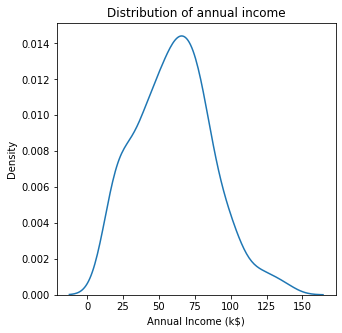

In [19]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.kdeplot(data = data, x=annual_income, ax = ax)
ax.set_title('Distribution of annual income')
plt.show()

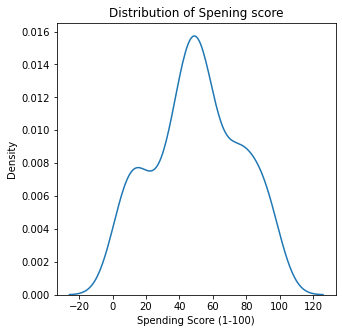

In [20]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.kdeplot(data = data, x=spending_score, ax = ax)
ax.set_title('Distribution of Spening score')
plt.show()

From this we can see that many young people, in the range of (20-40), prefer pizza. The distribution is left skewed

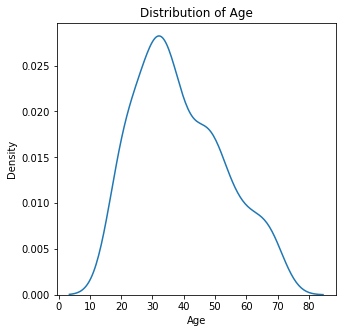

In [21]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.kdeplot(data = data, x=age, ax = ax)
ax.set_title('Distribution of Age')
plt.show()

In [22]:
from random import randint, seed
from pprint import pprint
import numpy as np
class kmeans:
    def __init__(self, clusters, random_seed = -1):
        self._n_clusters = int(clusters)
        self._random_seed = random_seed
    
    def fit(self, data: pd.DataFrame):
        # Initialise the centroids
        self._start_points(data)
        
        # Loop till all the points have been covered (which is to loop through the whole data)
        data_np = data.to_numpy()
        
        # Put all the points in cluster 0
        self._clusters = np.zeros(data_np.shape[0])
        
        isUnchanged = True
        
        while isUnchanged:
            self._prev_clusters = np.copy(self._clusters)
            for i in range(data_np.shape[0]):
                # Find the closest centroid
                point = data_np[i]
                closest_centroid_index = self._find_closest_centroid(point)
                self._clusters[i] = closest_centroid_index
            for i in range(self._n_clusters):
                indices = np.where(self._clusters == i)[0]
                self._update_centroid(data_np[indices], i)
            isUnchanged = not(np.array_equal(self._prev_clusters, self._clusters))
            
    def predict(self, data: pd.DataFrame):
        data_np = data.to_numpy()
        point_cluster = []
        for point in data_np:
            closest_centroid_index = self._find_closest_centroid(point)
            point_cluster.append(closest_centroid_index)
        return np.array(point_cluster)
    
    def get_centroids(self):
        return self._centroids
        
    
    def _start_points(self, data: pd.DataFrame):
        self._centroids = [0] * self._n_clusters
        if (self._random_seed >= 0):
            seed(self._random_seed)
        self._centroid_indices = [randint(0, data.shape[0] - 1) for _ in range(self._n_clusters)]
        for i in range(self._n_clusters):
            self._centroids[i] = data.loc[self._centroid_indices[i]].to_numpy()
            
    def _find_closest_centroid(self, point: np.ndarray):
        close_centroid = self._centroids[0]
        close_centroid_index = 0
        min_distance = np.sqrt(np.sum(np.square(point - close_centroid)))
        for index, centroid in enumerate(self._centroids):
            distance = np.sqrt(np.sum(np.square(point - centroid)))
            if (distance < min_distance):
                close_centroid = centroid
                close_centroid_index = index
                min_distance = distance
        return close_centroid_index
    
    def _update_centroid(self, point: np.ndarray, centroid_index: int):
        stacked = np.append(point, [self._centroids[centroid_index]], axis=0)
        self._centroids[centroid_index] = np.mean(stacked, axis = 0)
    

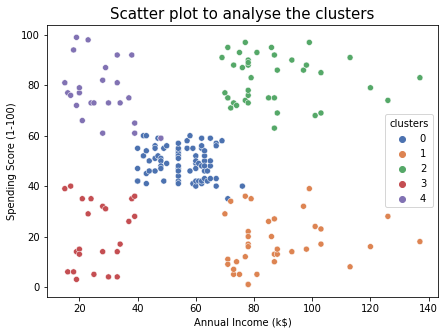

In [30]:
# Custom kmeans
k = kmeans(clusters=5, random_seed=0)
k.fit(data[[age, annual_income, spending_score]])


data[clusters] = k.predict(data[[age, annual_income, spending_score]])

fig, ax = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(data=data, x=annual_income, y=spending_score, hue=clusters, palette="deep", ax = ax)
ax.set_title('Scatter plot to analyse the clusters', fontsize=15)
plt.show()

## Cluster analysis
We can see that there are 5 types of clusters.
1. Low income / Low Spending
2. Low income / High Spending
3. Mid income / Mid Spending
4. High income / Low Spending
5. High income / High Spending

The **"Low Spending"** customers are not much use to us they are may not be willing to use the offers. But during simulations if we notice that such customers are frequent visitors, then we can give such customers more offers to increase their spending score.

"High spending" score is the target score audience while "Mid Spending" is the category where offers may be given randomly or based on visit frequency.